In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from hyppo.tools import SIMULATIONS
from hypothesis_tests import NEWCORR, BOOSTED

In [10]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['axes.titlesize'] = 18
# mpl.rcParams['text.usetex'] = True

In [11]:
sim_keys = list(SIMULATIONS.keys())[0:-2]
sim_keys

['linear',
 'exponential',
 'cubic',
 'joint_normal',
 'step',
 'quadratic',
 'w_shaped',
 'spiral',
 'uncorrelated_bernoulli',
 'logarithmic',
 'fourth_root',
 'sin_four_pi',
 'sin_sixteen_pi',
 'square',
 'two_parabolas',
 'circle',
 'ellipse',
 'diamond']

In [12]:
SIM_TITLES = {
    "linear": "Linear",
    "exponential": "Exponential",
    "cubic": "Cubic",
    "joint_normal": "Joint Normal",
    "step": "Step",
    "quadratic": "Quadratic",
    # "W-Shaped",
    "spiral": "Spiral",
    "uncorrelated_bernoulli": "Bernoulli",
    "logarthmic": "Logarithmic",
    "fourth_root": "Fourth Root",
    "sin_four_pi": "Sine 4\u03C0",
    # "Sine 16\u03C0",
    "square": "Square",
    "two_parabolas": "Two Parabolas",
    "circle": "Circle",
    "ellipse": "Ellipse",
    "diamond": "Diamond",
}

In [13]:
lims = {
    "linear": 0.5,
    "exponential": 0.5,
    "cubic": 0.5,
    "joint_normal": 0.5,
    "step": 0.5,
    "quadratic": 0.5,
    # "w_shaped": 0.5,
    "spiral": 1.0,
    "uncorrelated_bernoulli": 0.9,
    # "logarithmic": 0.5,
    "fourth_root": 0.5,
    "sin_four_pi": 0.5,
    # "sin_sixteen_pi": 1.0,
    "square": 0.9,
    "two_parabolas": 0.999,
    "circle": 0.9,
    "ellipse": 0.9,
    "diamond": 0.9,
}

In [14]:
import matplotlib.ticker as mticker

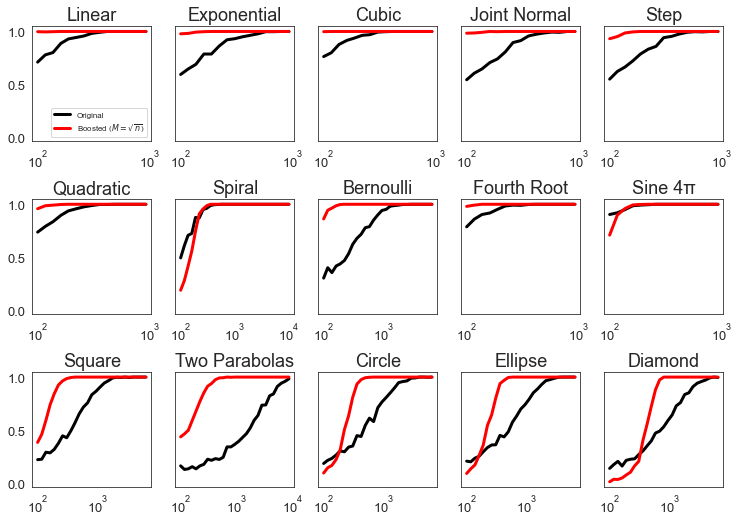

In [15]:
sns.set_style("white")

ncol = 5
fig, ax = plt.subplots(3, ncol, figsize=(12, 8), sharey=True)

sample_sizes = pickle.load(open("results/boosting/sample_sizes.p", "rb"))

colors = {
    NEWCORR: "k",
    BOOSTED: "r"
}

labs = {
    NEWCORR: "Original",
    BOOSTED: r"Boosted ($M = \sqrt{n}$)"
}

for k, sim_name in enumerate(lims):
    i = k // ncol
    j = k % ncol

    if sim_name in lims:
        lim = int(len(sample_sizes) * lims[sim_name])
    else:
        lim = len(sample_sizes)

    for test_name in [NEWCORR, BOOSTED]:
    # for test_name in [BOOSTED]:
    # for test_name in [NEWCORR]:
        y = []
        for n in sample_sizes:
            y.append(pickle.load(open(f"results/boosting/sim_{sim_name}_test_{test_name}_n_{n}_power.p", "rb")))
        ax[i, j].plot(sample_sizes[0:lim], y[0:lim], label=labs[test_name], c=colors[test_name])
        
    ax[i, j].set_title(SIM_TITLES[sim_name])
    ax[i, j].set_xticks([100, sample_sizes[lim - 1]])
    ax[i, j].set_xscale("log")

ax[0, 0].legend(loc="lower right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig("figs/boosted_power.pdf", bbox_inches="tight")